In [2762]:
# Libraries required to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2763]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

# Reading and Understanding the Data

In [2765]:
df=pd.read_csv('day.csv')

In [2766]:
print('day.csv file contains',df.shape)

day.csv file contains (730, 16)


## 1. DATA CLEANING

### 1.1 Row cleaning

**Delete summary rows: Total, Subtotal rows**<br/>
**Delete incorrect rows: Header rows, Footer rows**

In [2770]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2771]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


<span style="color:blue">From the head and tail commands we  can observe that there are no total, sub_total, header and footer rows</span>

## 1.2 Column cleaning

In [2774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2775]:
# check percentage of null values in columns
(df.isna().sum()/len(df))*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<span style="color:blue">We observed that there are no null columns</span>

In [2777]:
unique_columns = [col for col in df.columns if df[col].nunique() == len(df)]
unique_columns

['instant', 'dteday']

In [2778]:
# 1. Drop the instant column as it acts like a idex which is not useful in analysis
# 2. Drop the dteday column as yr and mnth columns are already present
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [2779]:
print('Shape of the dataframe after dropping the instant and dteday columns',df.shape)

Shape of the dataframe after dropping the instant and dteday columns (730, 14)


In [2780]:
# 1. Drop the columns casual and registered as they are not features
# 2. Also cnt is a target variable which is the sum of casual and registered
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [2781]:
print('Shape of the dataframe after dropping the casual and registered columns',df.shape)

Shape of the dataframe after dropping the casual and registered columns (730, 12)


In [2782]:
print('Total no.of duplicate rows', len(df[df.duplicated()]))

Total no.of duplicate rows 0


In [2783]:
# From data dictionary we observed that the categorical variables mentioned as numerical variables
# 1. season 2. weathersit 3.mnth
# Convert them to category type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


In [2784]:
df['season'].replace({
    1:"spring",
    2:"summer",
    3:"fall",
    4:"winter"
}, inplace=True)

df['weathersit'].replace({
  1: "clear_weather",
  2: "misty_weather",
  3: "light_precipitation",
  4: "severe_weather"
}, inplace=True)

df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)

df['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600


## 2. Exploratory Data Analysis

### 2.1 UNIVARIATE ANALYSIS

#### Visualizing numerical variables

#### 2.1.1 Box plot of numeric variables to observe outliers

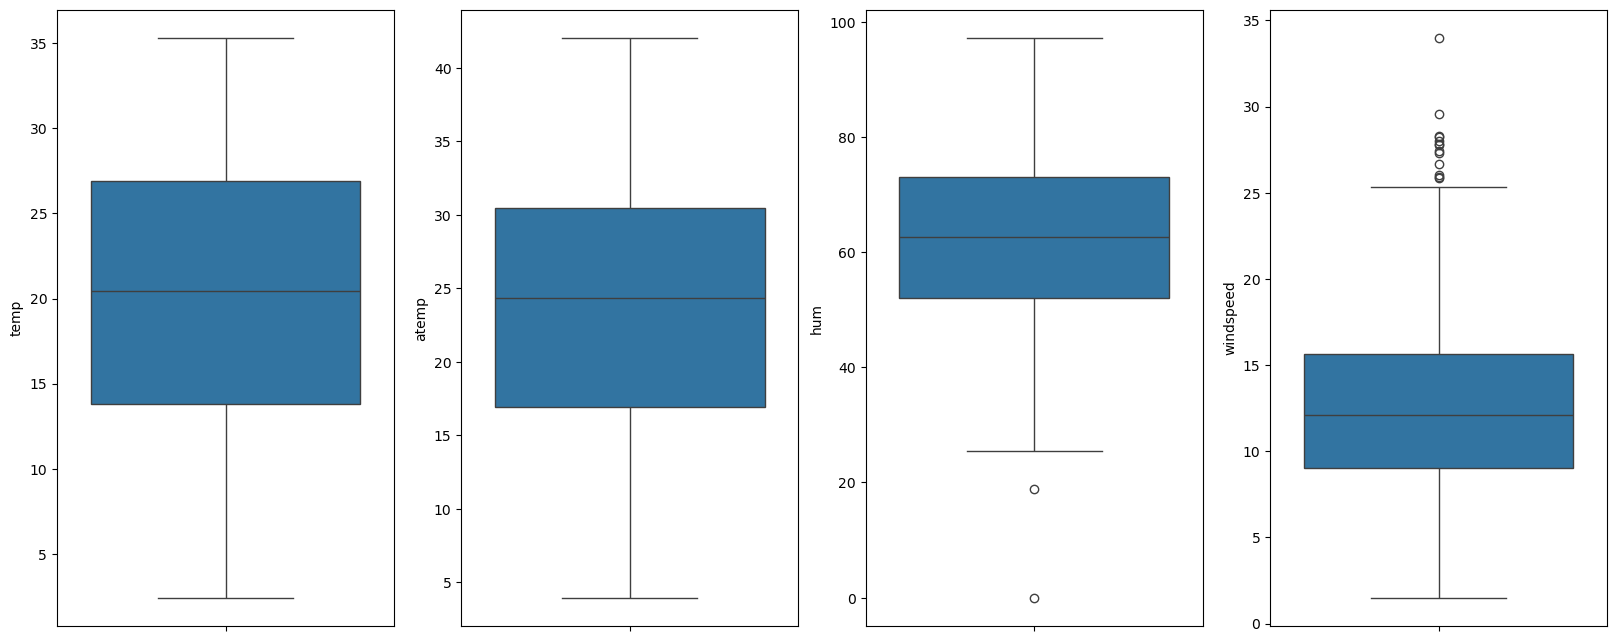

In [2789]:
# Visualizing numerical variables
# 1.temp 2.atemp 3.hum 4.windspeed
plt.figure(figsize=(20, 8))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=df)
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=df)
plt.subplot(1,4,3)
sns.boxplot(y='hum', data=df)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=df)

plt.show()

<span style="color:green">Inference: </br> 
1. For numerical variables there are no considerable amount of outliers </br>
</span>

#### 2.1.2 Line graph of cnt along month and year

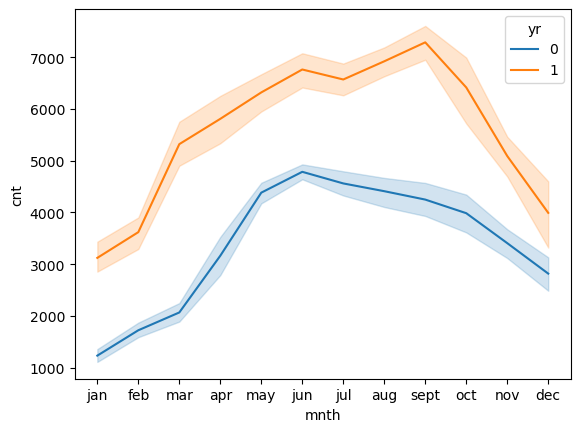

In [2792]:
sns.lineplot(data=df, x='mnth', y='cnt', hue='yr')
plt.show()

<span style="color:green">Inferences: </br> 
1. For both years, rental bike counts are increasing in middle of the year from may to october(Demand is high) </br>
2. For both years, both starting and end of the year counts are decresing(Demand is low)
</span>

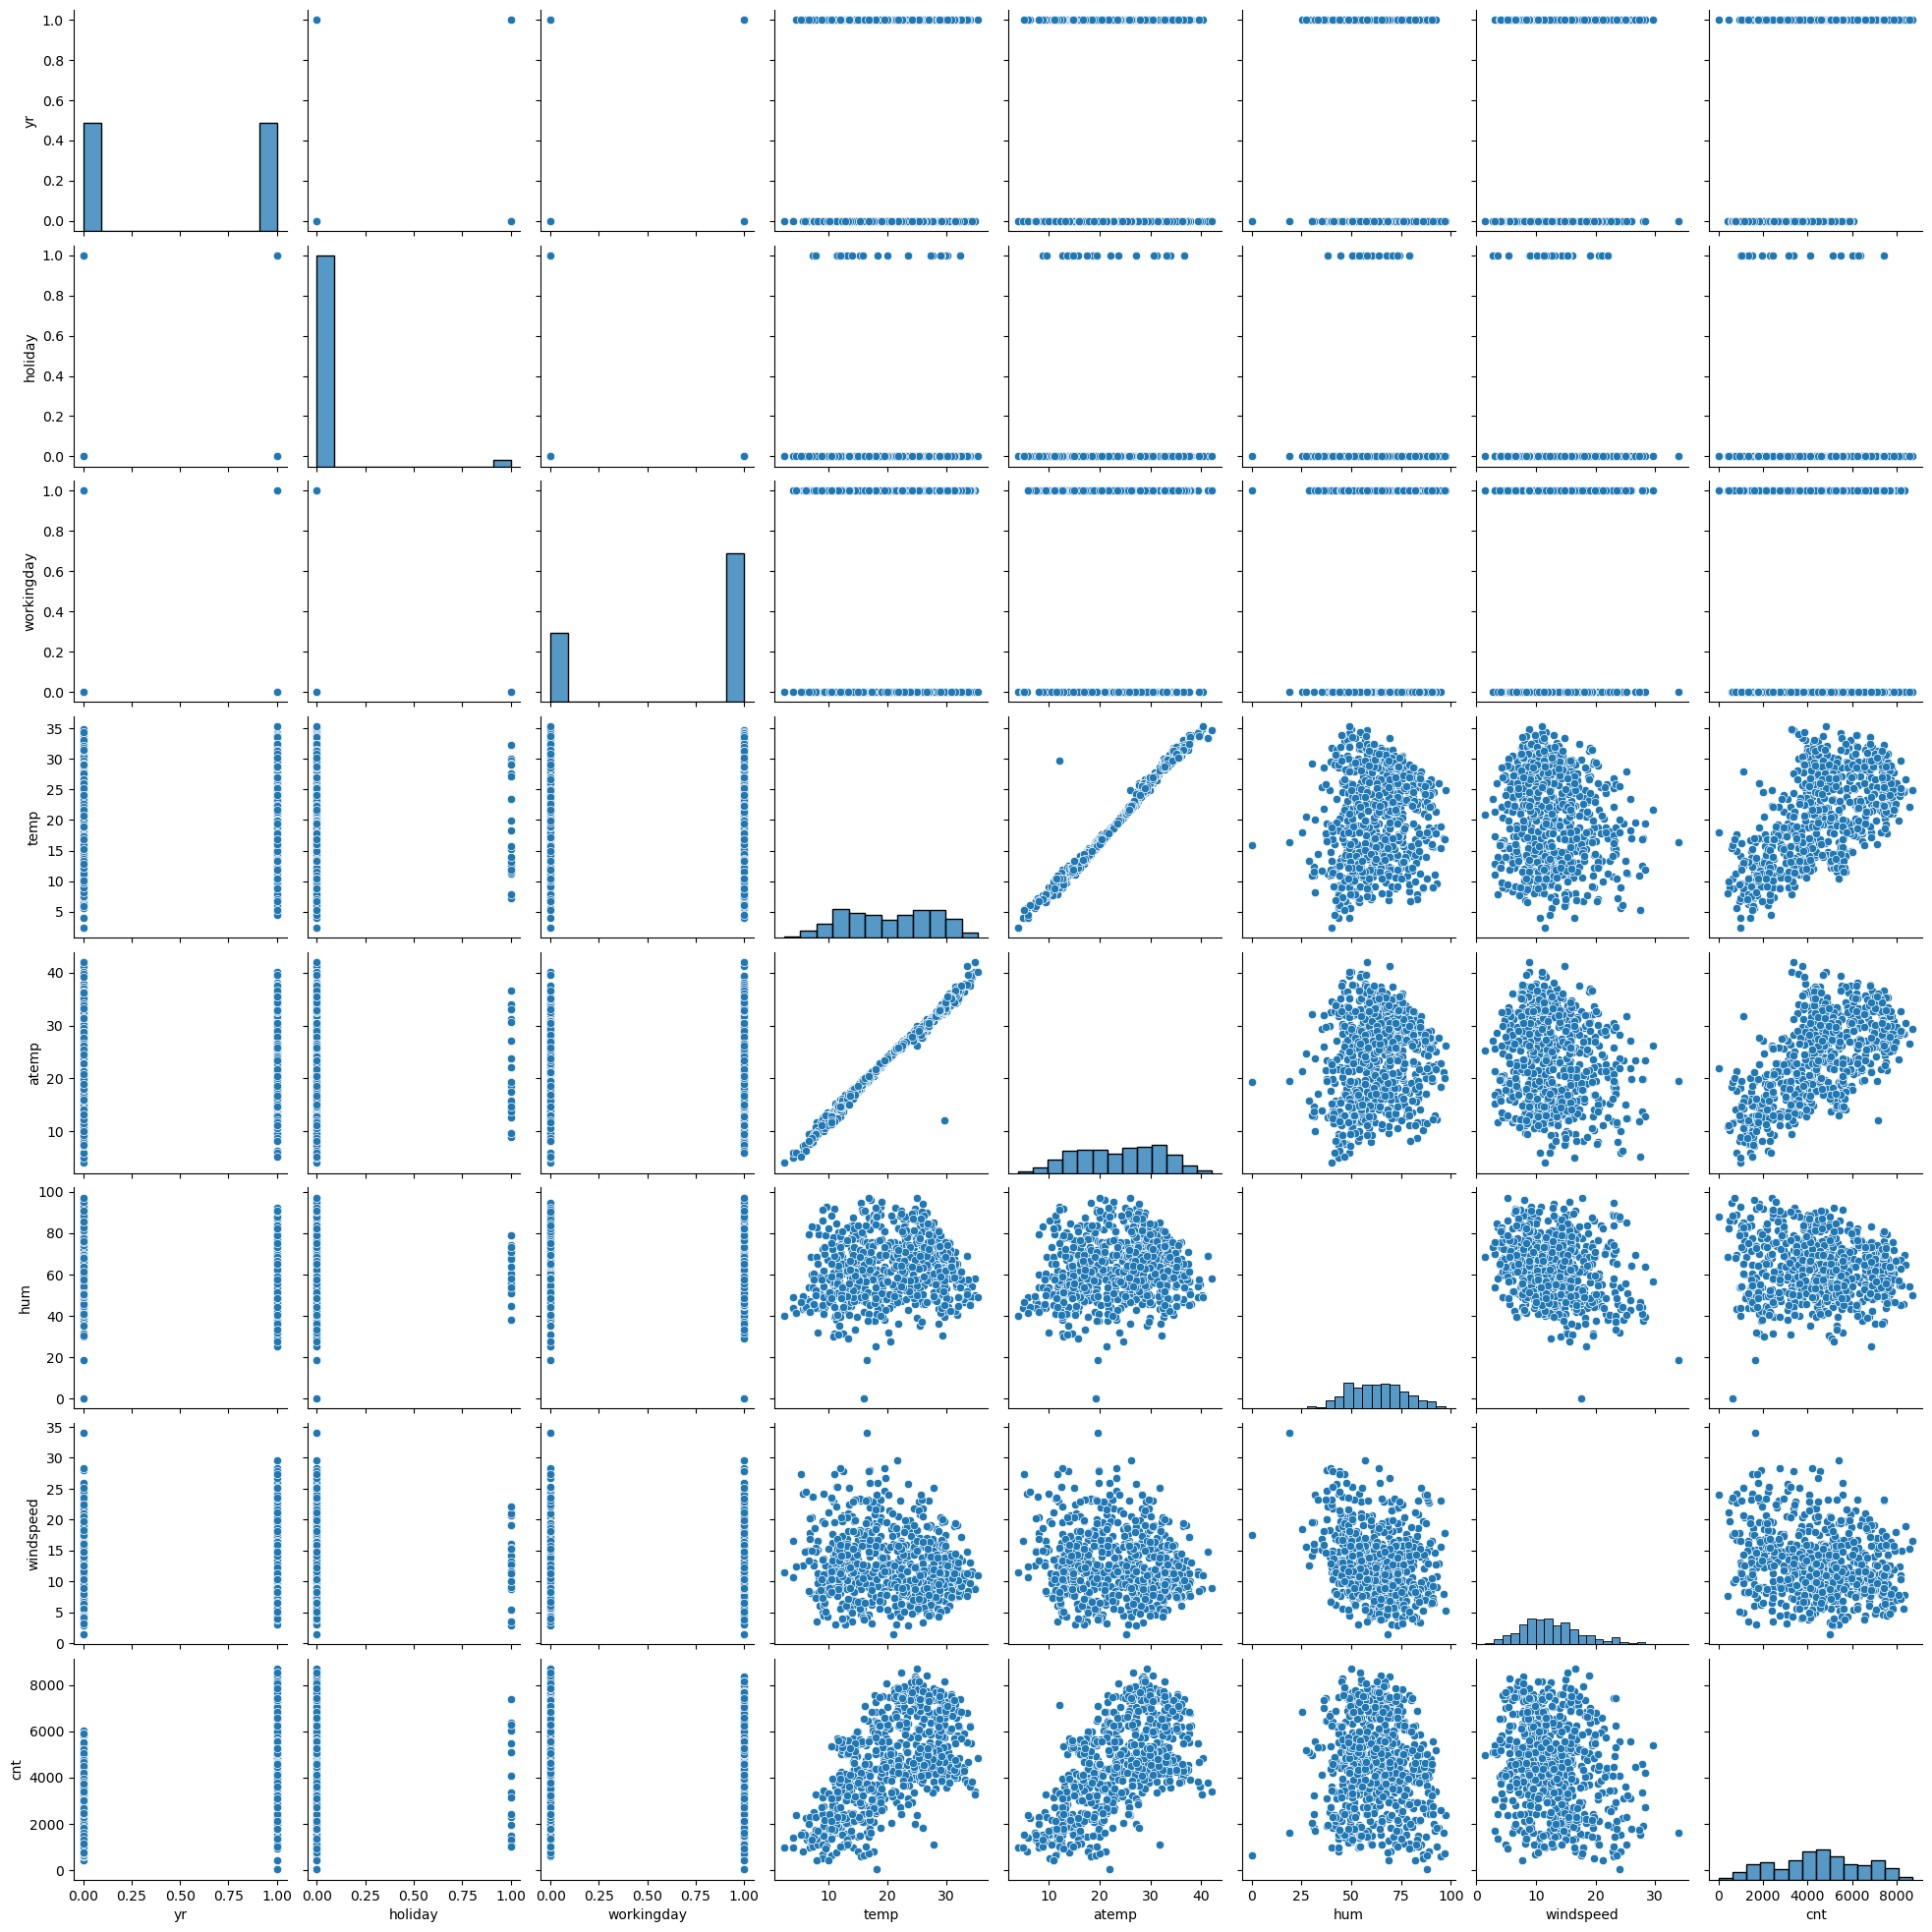

In [2794]:
sns.pairplot(df)
plt.show()

<span style="color:green">Inferences: </br> 
1. temp,atemp and cnt are having  linear dependency </br>
</span>

### 2.2 BIVARIATE ANALYSIS

In [2797]:
def plot_bar_graphs_vs_cnt(feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(data=df, x=feature, y='cnt', palette='Set2')
    plt.title(f'{feature} vs cnt')
    
    plt.subplot(1,2,2)
    sns.barplot(data=df, x=feature, y='cnt', palette='Set2', hue='yr')
    plt.title(f'{feature} vs cnt(2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])

    plt.tight_layout()
    plt.show()

#### 2.2.1 Bar graph of season vs cnt

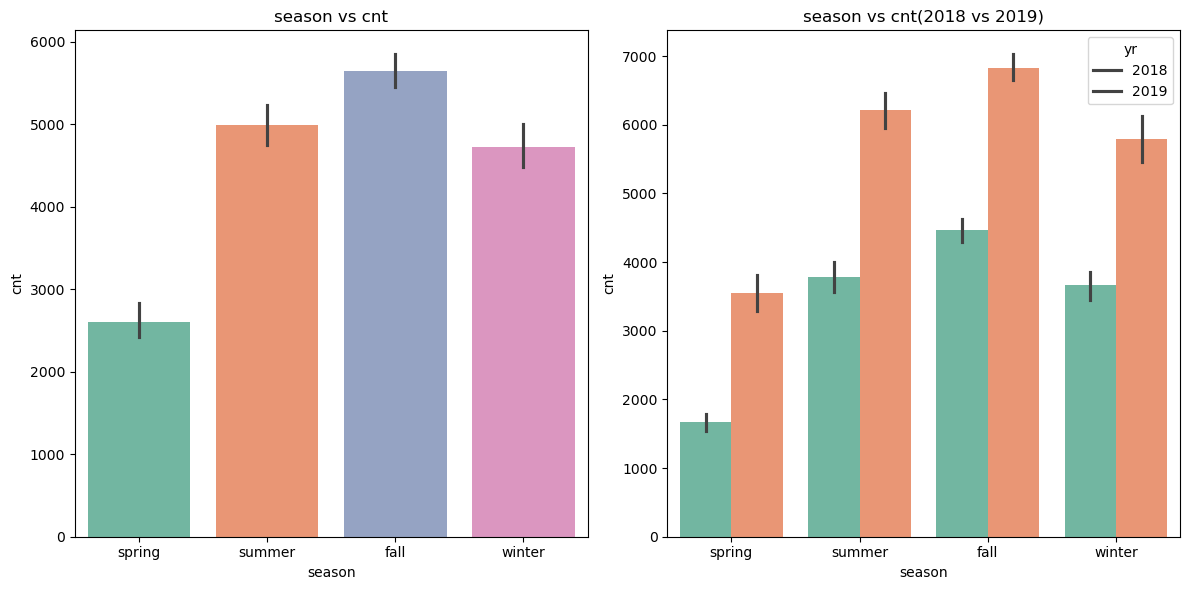

In [2799]:
plot_bar_graphs_vs_cnt('season')

<span style="color:green">Inferences: </br> 
1. Fall season has highest rentals follwed by summer </br>
2. Rentals are increased drastically for every season in 2019 compared to 2018
</span>

#### 2.2.2 Bar graph of months vs cnt

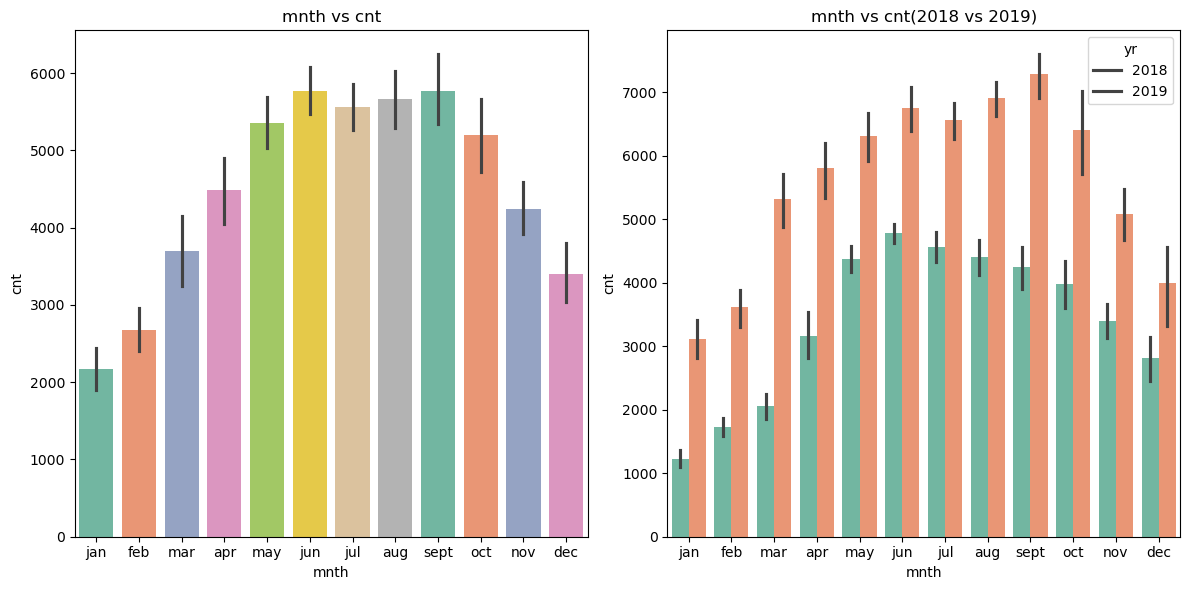

In [2802]:
plot_bar_graphs_vs_cnt('mnth')

<span style="color:green">Inferences: </br> 
1. Rentals follow a increasing pattern from January  to June  </br>
2. From June to September almost has equal number of rentals and then decreased from october
2. Rentals are increased drastically for every month in 2019 compared to 2018
</span>

#### 2.2.3 Bar graph of holiday vs cnt

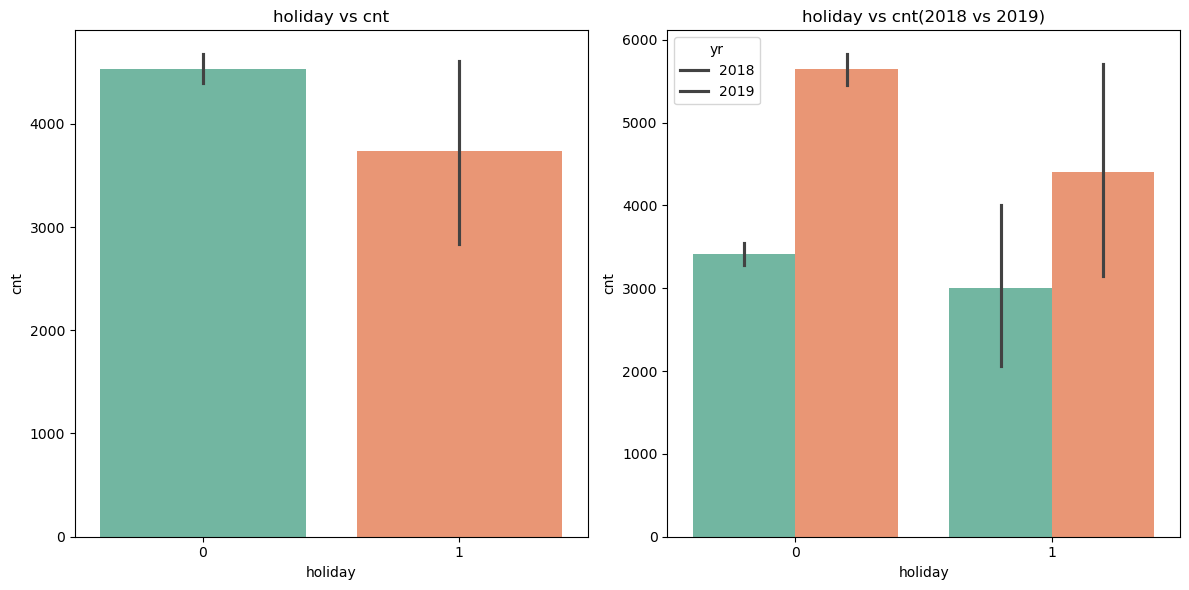

In [2805]:
plot_bar_graphs_vs_cnt('holiday')

<span style="color:green">Inferences: </br> 
1. Rentals on non-holidays are more than holidays  </br>
2. Rentals are increased drastically for holiday and non-holiday in 2019 compared to 2018
</span>

#### 2.2.4 Bar graph of weekday vs cnt

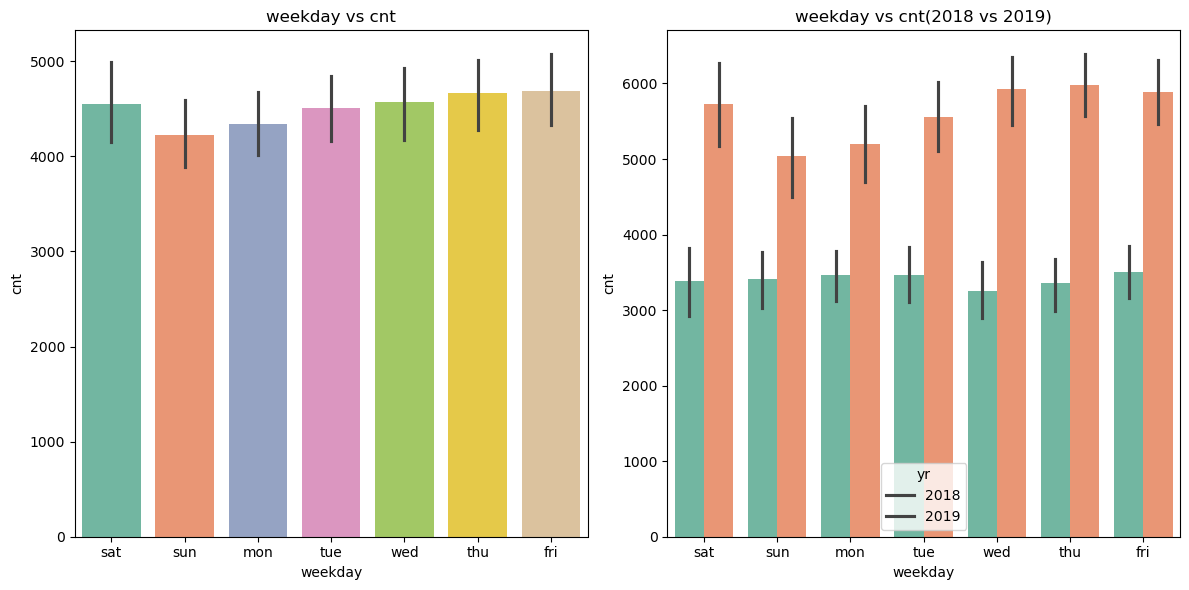

In [2808]:
plot_bar_graphs_vs_cnt('weekday')

<span style="color:green">Inferences: </br> 
1. Rentals are more on Thurday's and Friday's </br>
2. Rentals are increased drastically for weekday in 2019 compared to 2018
</span>

#### 2.2.5 Bar graph of workingday vs cnt

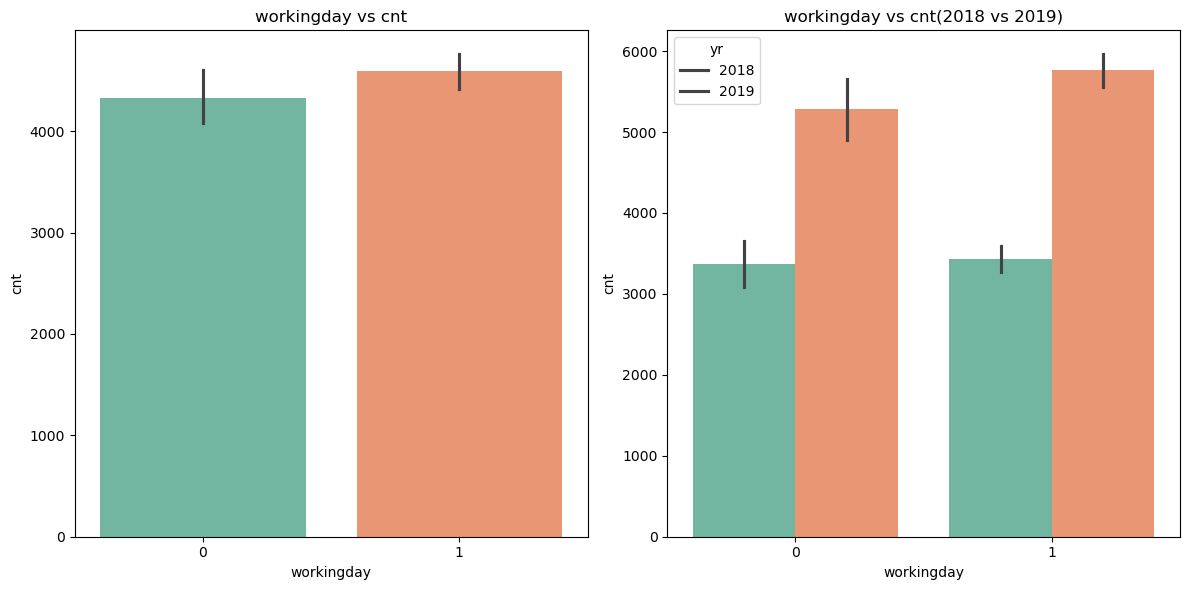

In [2811]:
plot_bar_graphs_vs_cnt('workingday')

<span style="color:green">Inferences: </br> 
1. Rentals are more on working day </br>
2. Rentals are increased drastically for working day in 2019 compared to 2018
</span>

#### 2.2.5 Bar graph of weathersit vs cnt

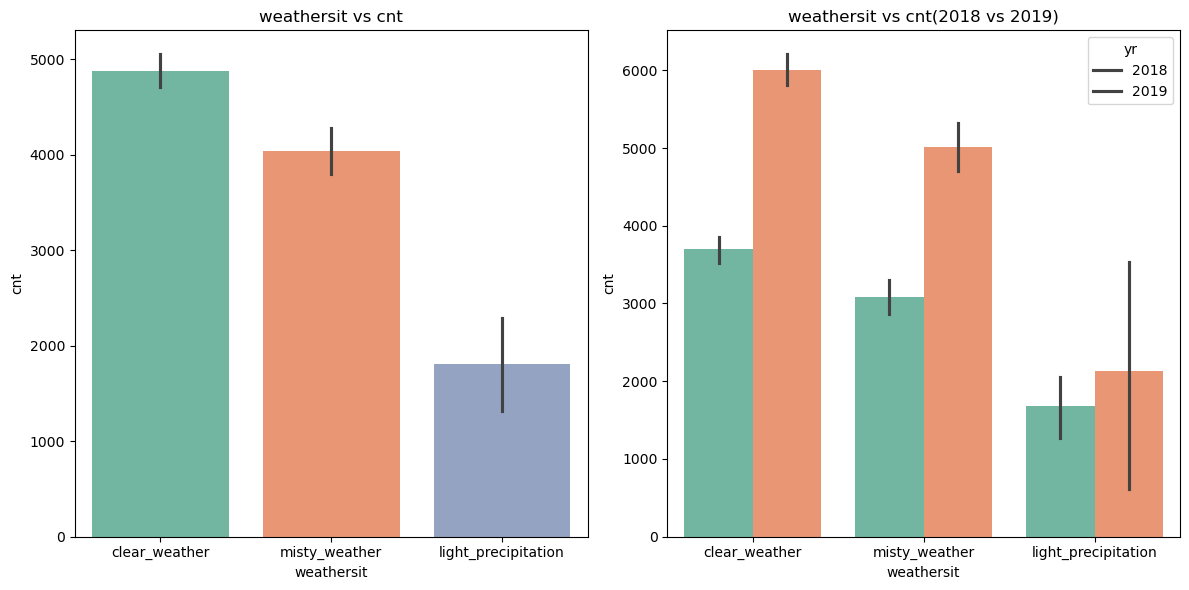

In [2814]:
plot_bar_graphs_vs_cnt('weathersit')

<span style="color:green">Inferences: </br> 
1. Rentals are more on clear weather days </br>
2. Rentals are increased drastically for every type of weather in 2019 compared to 2018
</span>

### 2.3 HEAT MAP

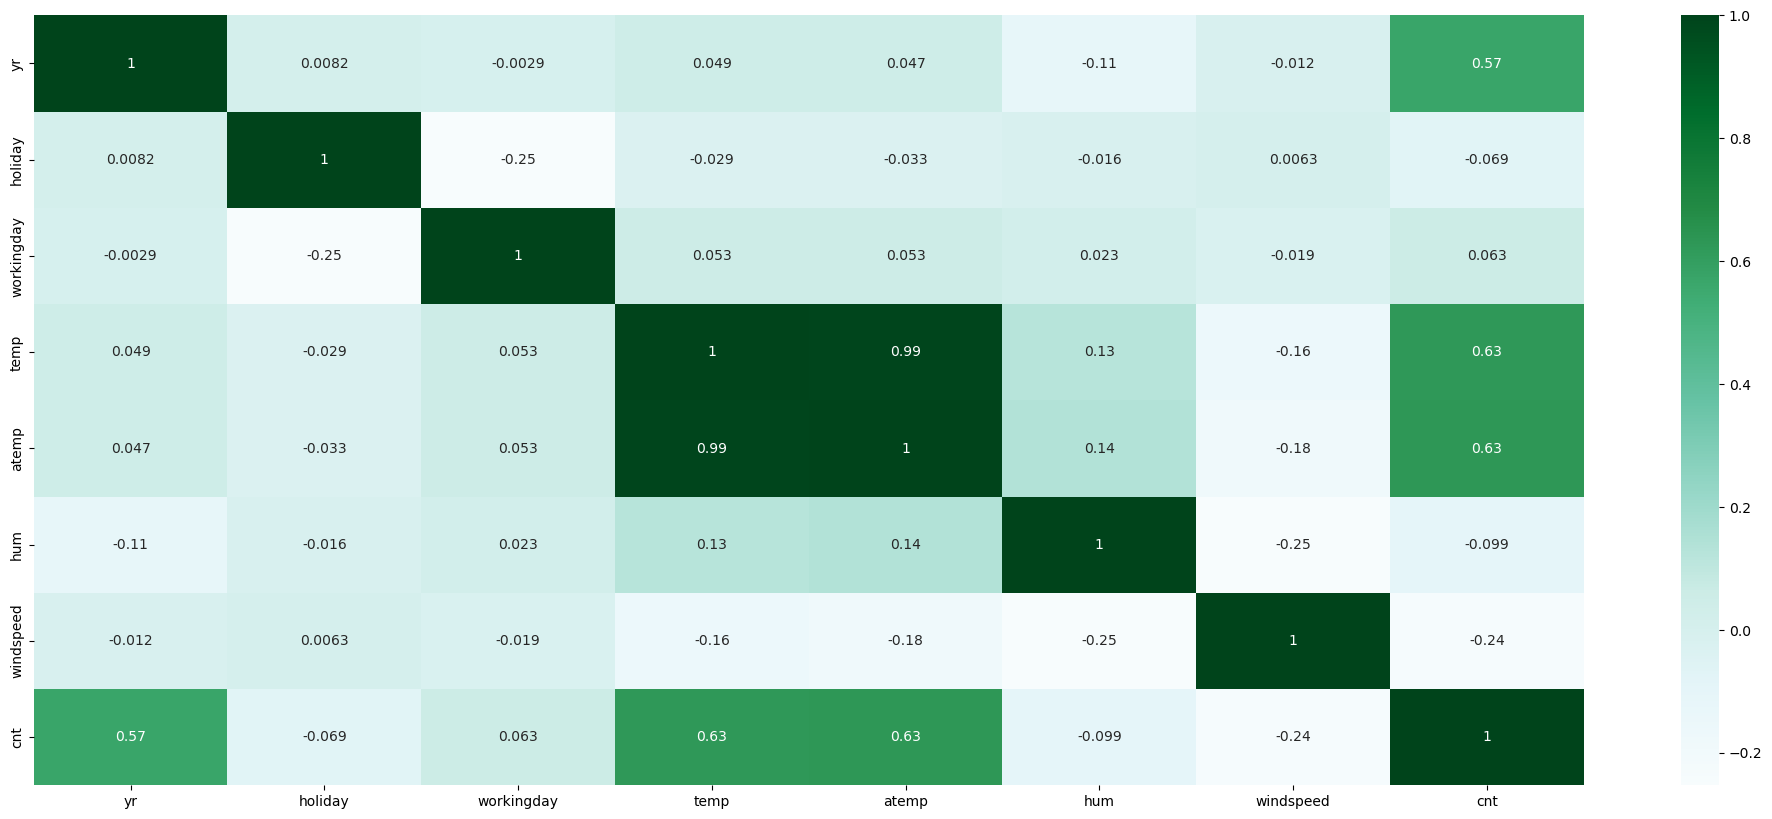

In [2817]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot = True, cmap='BuGn')
plt.show()

<span style="color:green">Inferences: </br> 
1. Independent variables windspeed, hum and holiday are negatively correlated with target cnt </br>
2. Independent variables temp and atemp are strongly corelated with other
</span>

## 3. Data Preparation 

In [2820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


In [2821]:
# Create dummy variables for categorical columns
# 1. season 2. mnth 3.weekday 4.weatherlist
df=pd.get_dummies(df, drop_first=True, dtype='int')

In [2822]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty_weather,weathersit_light_precipitation
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 4.Splitting the Data into Training and Testing Sets 

In [2824]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=100)

In [2825]:
print('Shape of the train set', df_train.shape)

Shape of the train set (510, 30)


In [2826]:
print('Shape of the train set', df_test.shape)

Shape of the train set (219, 30)


### 4.1 Rescaling the Features 

In [2828]:
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
scaler=MinMaxScaler()
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [2829]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty_weather,weathersit_light_precipitation
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [2830]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sept,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_misty_weather,weathersit_light_precipitation
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


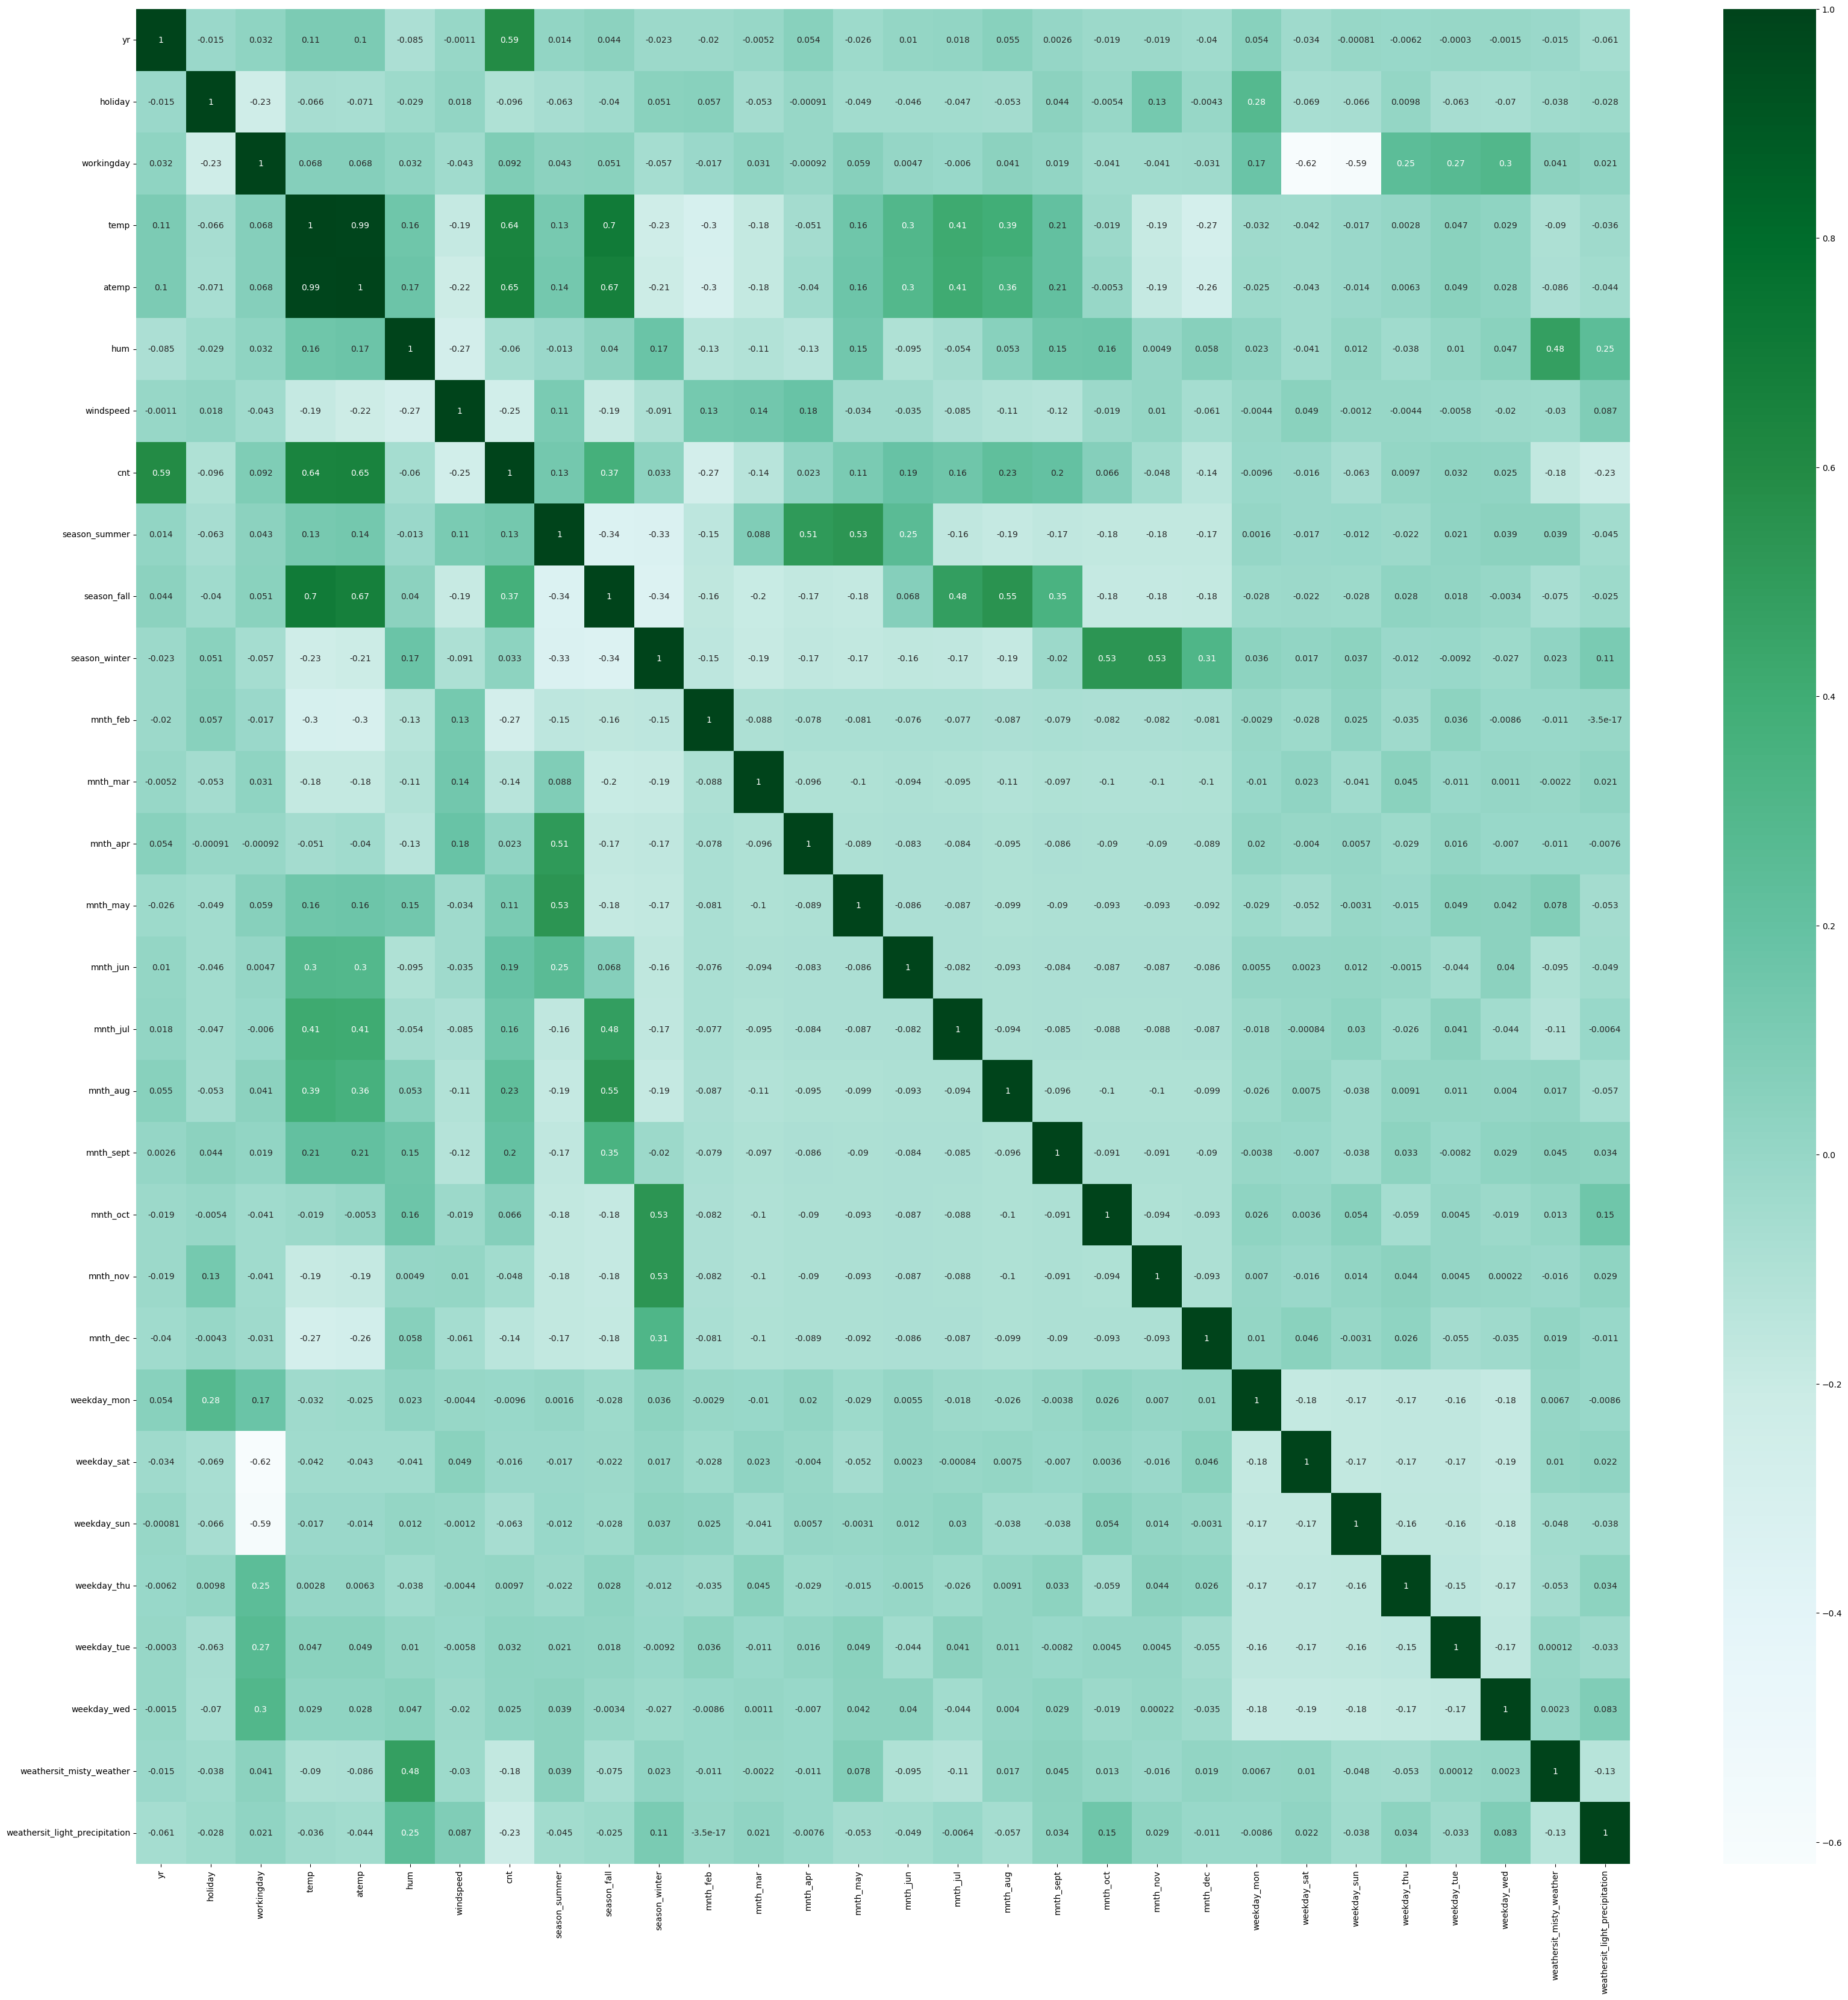

In [2831]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="BuGn")
plt.show()

### 4.2 Dividing into X and Y sets for the model building

In [2833]:
y_train = df_train.pop('cnt')
X_train = df_train

## 5.Building a linear model

### 5.1 MODEL-1

In [2836]:
# creating a model with all the features
X_train_lm=sm.add_constant(X_train)

# creating first fitted model
lr=sm.OLS(y_train, X_train_lm).fit()

In [2837]:
lr.params

const                             0.156320
yr                                0.232208
holiday                          -0.011540
workingday                        0.074733
temp                              0.401322
atemp                             0.050628
hum                              -0.151812
windspeed                        -0.184388
season_summer                     0.086796
season_fall                       0.048580
season_winter                     0.153968
mnth_feb                          0.030389
mnth_mar                          0.063853
mnth_apr                          0.062565
mnth_may                          0.087257
mnth_jun                          0.060862
mnth_jul                          0.023289
mnth_aug                          0.078641
mnth_sept                         0.144371
mnth_oct                          0.070260
mnth_nov                          0.020783
mnth_dec                          0.016994
weekday_mon                      -0.021502
weekday_sat

In [2838]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          8.42e-181
Time:                        23:50:13   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1563      0.023      6.668      0.000       0.110       0.202
yr                                 0.2322      0.008     28.792      0.000       0.216       0.248
holiday                           -0.0115      0.023     -0.505      0.614      -0.056       0.033
workingday                         0.0747      0.011      7.009      0.000       0.054       0.096
temp                               0.4013      0.142      2.821      0.005       0.122       0.681
atemp                              0.0506      0.138      0.366      0.714      -0.221       0.322
hum                               -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                         -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_summer                      0.0868      0.024      3.679      0.000       0.040       0.133
season_fall                        0.0486      0.030      1.618      0.106      -0.010       0.108
season_winter                      0.1540      0.026      5.932      0.000       0.103       0.205
mnth_feb                           0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_mar                           0.0639      0.022      2.857      0.004       0.020       0.108
mnth_apr                           0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_may                           0.0873      0.036      2.412      0.016       0.016       0.158
mnth_jun                           0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_jul                           0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_aug                           0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_sept                          0.1444      0.037      3.853      0.000       0.071       0.218
mnth_oct                           0.0703      0.034      2.041      0.042       0.003       0.138
mnth_nov                           0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_dec                           0.0170      0.027      0.641      0.522      -0.035       0.069
weekday_mon                       -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_sat                        0.0738      0.012      6.120      0.000       0.050       0.098
weekday_sun                        0.0193      0.013      1.527      0.128      -0.006       0.044
weekday_thu                       -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tue                       -0.0193      0.016     -1.242      0.215      -0.050       0.011
weekday_wed                       -0.0057      0.015     -0.384      0.701      -0.035       0.024
weathersit_mis

<span style="color:green">Observation: </br> 
1. R-squared and Adj. R-squared is having 0.853 and 0.845 which is very good
</span>

In [2840]:
# As there are 30 columns/predicator variables removing insignificant variables manually will take some time.
# so we are going with RFE+Manual(Hybrid) model
# Currently we are selecting 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 3),
 ('mnth_apr', False, 5),
 ('mnth_may', False, 4),
 ('mnth_jun', False, 6),
 ('mnth_jul', False, 13),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 11),
 ('mnth_dec', False, 12),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weathersit_misty_weather', True, 1),
 ('weathersit_light_precipitation', True, 1)]

In [2841]:
# RFE Supported variables
col=X_train.columns[rfe.support_]
print('Length of supported variables', len(col))
print('List of columns:', col)

Length of supported variables 15
List of columns: Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sept', 'mnth_oct',
       'weekday_sat', 'weekday_sun', 'weathersit_misty_weather',
       'weathersit_light_precipitation'],
      dtype='object')


In [2842]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_fall', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [2843]:
X_train_rfe=X_train[col]

### 5.2 MODEL-2

In [2845]:
# Function to calculte VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [2846]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.44
11,weekday_sat,7.77
12,weekday_sun,7.65
1,holiday,2.14
4,hum,1.88
7,season_winter,1.72
3,temp,1.59
13,weathersit_misty_weather,1.57
10,mnth_oct,1.49
8,mnth_aug,1.46


In [2847]:
#ADD A CONSTANT
X_train_lm=sm.add_constant(X_train_rfe)

#FIT THE MODEL
lr=sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.24e-192
Time:                        23:50:13   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1639      0.022      7.510      0.000       0.121       0.207
yr                                 0.2292      0.008     28.743      0.000       0.213       0.245
holiday                           -0.0252      0.021     -1.219      0.223      -0.066       0.015
workingday                         0.0750      0.009      8.571      0.000       0.058       0.092
temp                               0.5301      0.022     24.136      0.000       0.487       0.573
hum                               -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed                         -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_summer                      0.1039      0.011      9.680      0.000       0.083       0.125
season_winter                      0.1348      0.012     11.316      0.000       0.111       0.158
mnth_aug                           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_sept                          0.1255      0.016      7.783      0.000       0.094       0.157
mnth_oct                           0.0411      0.017      2.403      0.017       0.007       0.075
weekday_sat                        0.0835      0.011      7.679      0.000       0.062       0.105
weekday_sun                        0.0306      0.011      2.666      0.008       0.008       0.053
weathersit_misty_weather          -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_light_precipitation    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<span style="color:green">Observation: </br> 
1. R-squared and Adj. R-squared are having good values with 0.848 and 0.844
2. workingday is having vif of 31.44 > 5
3. holiday feature is having p-value of 0.223>0.05
</span>

In [2849]:
# Dropping the high correlated feature workingday
X_train_rfe.drop(['workingday'], axis=1, inplace=True)

In [2850]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sat,weekday_sun,weathersit_misty_weather,weathersit_light_precipitation
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,1,0


### 5.3 MODEL-3

In [2852]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,14.77
2,temp,9.88
4,windspeed,3.64
6,season_winter,2.27
12,weathersit_misty_weather,2.15
0,yr,2.02
5,season_summer,1.83
9,mnth_oct,1.61
7,mnth_aug,1.60
8,mnth_sept,1.34


In [2853]:
#ADD A CONSTANT
X_train_lm=sm.add_constant(X_train_rfe)

#FIT THE MODEL
lr=sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.24e-192
Time:                        23:50:13   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2389      0.027      8.917      0.000       0.186       0.292
yr                                 0.2292      0.008     28.743      0.000       0.213       0.245
holiday                           -0.1002      0.025     -3.961      0.000      -0.150      -0.050
temp                               0.5301      0.022     24.136      0.000       0.487       0.573
hum                               -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed                         -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_summer                      0.1039      0.011      9.680      0.000       0.083       0.125
season_winter                      0.1348      0.012     11.316      0.000       0.111       0.158
mnth_aug                           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_sept                          0.1255      0.016      7.783      0.000       0.094       0.157
mnth_oct                           0.0411      0.017      2.403      0.017       0.007       0.075
weekday_sat                        0.0086      0.011      0.771      0.441      -0.013       0.030
weekday_sun                       -0.0444      0.012     -3.850      0.000      -0.067      -0.022
weathersit_misty_weather          -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_light_precipitation    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:green">Observation: </br> 
1. R-squared and Adj. R-squared are not changed
2. hum is having vif of 14.77 > 5
3. weekday_sat feature is having p-value of 0.441>0.05
</span>

In [2855]:
# Dropping the high correlated feature hum is reducing Adj. R-squared:
# So first we are remving high p-value feature weekday_sat
X_train_rfe.drop(['weekday_sat'], axis=1, inplace=True)
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sun,weathersit_misty_weather,weathersit_light_precipitation
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,1,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0


### 5.4 MODEL-4

In [2857]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,14.67
2,temp,9.88
4,windspeed,3.59
6,season_winter,2.27
11,weathersit_misty_weather,2.15
0,yr,2.02
5,season_summer,1.83
9,mnth_oct,1.61
7,mnth_aug,1.60
8,mnth_sept,1.34


In [2858]:
#ADD A CONSTANT
X_train_lm=sm.add_constant(X_train_rfe)

#FIT THE MODEL
lr=sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     212.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          2.92e-193
Time:                        23:50:13   Log-Likelihood:                 518.85
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     496   BIC:                            -950.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2412      0.027      9.065      0.000       0.189       0.294
yr                                 0.2289      0.008     28.745      0.000       0.213       0.245
holiday                           -0.1019      0.025     -4.044      0.000      -0.151      -0.052
temp                               0.5296      0.022     24.134      0.000       0.487       0.573
hum                               -0.1703      0.037     -4.616      0.000      -0.243      -0.098
windspeed                         -0.1850      0.025     -7.339      0.000      -0.235      -0.136
season_summer                      0.1039      0.011      9.678      0.000       0.083       0.125
season_winter                      0.1350      0.012     11.340      0.000       0.112       0.158
mnth_aug                           0.0562      0.016      3.495      0.001       0.025       0.088
mnth_sept                          0.1256      0.016      7.793      0.000       0.094       0.157
mnth_oct                           0.0411      0.017      2.407      0.016       0.008       0.075
weekday_sun                       -0.0459      0.011     -4.054      0.000      -0.068      -0.024
weathersit_misty_weather          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
weathersit_light_precipitation    -0.2483      0.026     -9.551      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       68.893   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.128
Skew:                          -0.677   Prob(JB):                     7.69e-40
Kurtosis:                       5.577   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:green">Observation: </br> 
1. R-squared and Adj. R-squared are not changed
2. hum is having vif of 14.67 > 5
3. all the p-values are less than 0.05
</span>

In [2860]:
# Dropping the column hum which is having high vif
X_train_rfe.drop(['hum'], axis=1, inplace=True)
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sept,mnth_oct,weekday_sun,weathersit_misty_weather,weathersit_light_precipitation
653,1,0,0.509887,0.300794,0,1,0,0,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,0,1,0


### 5.5 MODEL-5

In [2862]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.18
3,windspeed,3.13
0,yr,2.00
5,season_winter,1.95
4,season_summer,1.82
6,mnth_aug,1.60
8,mnth_oct,1.60
10,weathersit_misty_weather,1.49
7,mnth_sept,1.34
9,weekday_sun,1.17


In [2863]:
#ADD A CONSTANT
X_train_lm=sm.add_constant(X_train_rfe)

#FIT THE MODEL
lr=sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          6.27e-190
Time:                        23:50:13   Log-Likelihood:                 508.13
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.1441      0.017      8.673      0.000       0.111       0.177
yr                                 0.2327      0.008     28.788      0.000       0.217       0.249
holiday                           -0.1039      0.026     -4.041      0.000      -0.154      -0.053
temp                               0.5092      0.022     23.220      0.000       0.466       0.552
windspeed                         -0.1521      0.025     -6.166      0.000      -0.201      -0.104
season_summer                      0.1007      0.011      9.218      0.000       0.079       0.122
season_winter                      0.1269      0.012     10.562      0.000       0.103       0.150
mnth_aug                           0.0545      0.016      3.323      0.001       0.022       0.087
mnth_sept                          0.1189      0.016      7.265      0.000       0.087       0.151
mnth_oct                           0.0372      0.017      2.134      0.033       0.003       0.071
weekday_sun                       -0.0494      0.012     -4.286      0.000      -0.072      -0.027
weathersit_misty_weather          -0.0854      0.009     -9.845      0.000      -0.102      -0.068
weathersit_light_precipitation    -0.2942      0.024    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       67.377   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.369
Skew:                          -0.664   Prob(JB):                     8.30e-39
Kurtosis:                       5.547   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:green">Observation: </br> 
1. Adj. R-squared is slightly decreased from 0.844 to 0.838 after removing hum feature
2. Removing hum feture is necessary as it indicates  multicollinearity
3. temp is having vif of 5.18 which can be negotiated 
4. all the p-values are less than 0.05
</span>

## 6.Residual Analysis of the train data

In [2930]:
y_train_pred=lr.predict(X_train_lm)
# Calculating error
residual=y_train-y_train_pred

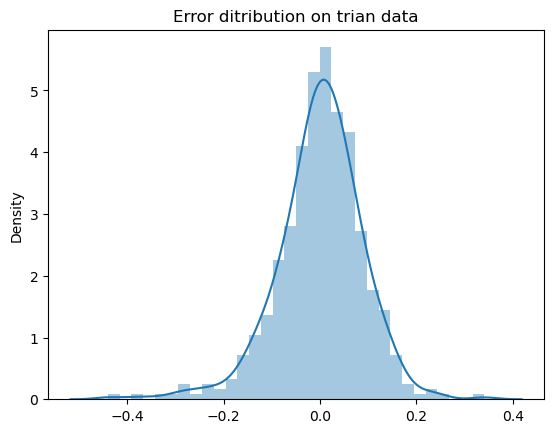

In [2936]:
# Assumption 1 residual should be normally distributed with the mean zero
sns.distplot(residual)
plt.title('Error ditribution on trian data')
plt.show()

<span style="color:green">Inferences: </br> 
1. Above graph is evident of normal distribution with the mean of zero
</span>

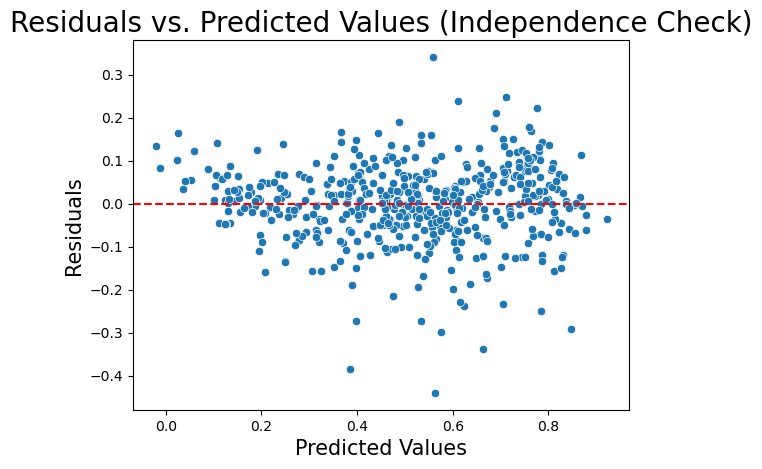

In [2942]:
# Assumption 2 Error terms are independent
sns.scatterplot(x=y_train_pred, y=residual)
plt.title('Residuals vs. Predicted Values (Independence Check)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at y=0
plt.show()

In [ ]:
<span style="color:green">Observation: </br> 
1. In above graph there is almost no relation between Residual & Predicted Value
</span>

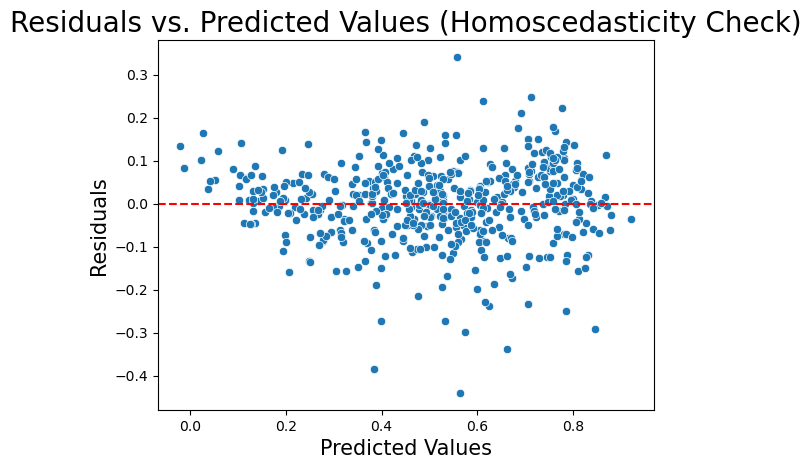

In [2944]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.title('Residuals vs. Predicted Values (Homoscedasticity Check)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.axhline(0, color='red', linestyle='--')  # Add a reference line at y=0
plt.show()